In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from scipy.stats import norm
# input path to python code
sys.path.append()

from Argon_Test import ArAr_Age_Calc # Import python notebook

In [2]:
"""
R_values for selected samples
"""
R_values = np.array([0.026886452984610964, 
                         0.027478678624720396,
                        0.041707, 
                         0.22913,
                        1.0000, 
                        1.0112, 
                        2.3650, 
                        3.5958, 
                        9.4918, 
                        51.878, 
                         205.59,
                        211.42])

R_values_err = np.array([1.6896016363273555e-05,
                             2.220299896074413e-05,
                            0.000011, 
                             0.000047,
                            0.0011,
                             0.0010,
                            0.0015, 
                            0.0031, 
                            0.0038, 
                            0.0592, 
                             0.25,
                            1.52])

In [3]:
sample_names = ['BishopTuff', 
               'MBB',
              'AlderCreek', 
               'MT',
              'FishCanyon', 
              'TaylorCreek', 
              'KTBoundary', 
              'GA1550', 
              'PTB', 
              'Hb3gr', 
                'WA1ms',
              'NL25']

# Example Test of sample NL-25 
* Comparison of all age ouputs and unceratinty budgets

In [4]:
bayescal_test = ArAr_Age_Calc.ArArWorkSheet(R_values[-1], R_values_err[-1], 
                                   sample_name = sample_names[-1], 
                                  Calibration = 'BayesCal')

In [5]:
sj_test = ArAr_Age_Calc.ArArWorkSheet(R_values[-1], R_values_err[-1], 
                                   sample_name = sample_names[-1], 
                                  Calibration = 'SJ')

In [6]:
min_test = ArAr_Age_Calc.ArArWorkSheet(R_values[-1], R_values_err[-1], 
                                   sample_name = sample_names[-1], 
                                  Calibration = 'Min2000')

In [7]:
renne_test= ArAr_Age_Calc.ArArWorkSheet(R_values[-1], R_values_err[-1], 
                                   sample_name = sample_names[-1], 
                                  Calibration = 'Renne2011')

# Bayesian Calibration

In [8]:
# Function return a summary of the results at all three levels
bayescal_test.Age_Uncertainties_All()


Where:
  - The first uncertainty (X) is computed using only the uncertainty in R (just_R).
  - The second uncertainty (Y) combines the uncertainties of R and FCs (R_and_FCS).
  - The third uncertainty (Z) combines the uncertainties of R, FCs, and the decay constant (Lam40).


'Age: 2652.20 ± 10.03 (R only) (Ma), ± 10.06 (R + FCs) (Ma), ± 10.14 (R + FCs + Lam40) (Ma)'

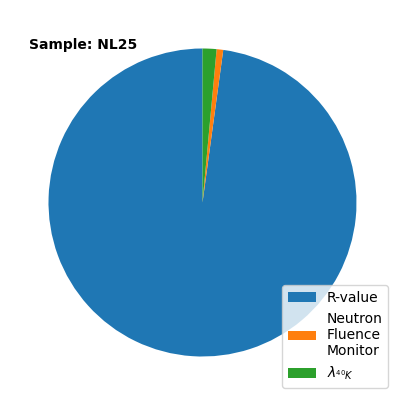

In [9]:
# Visualizing the uncertainty budget w.r.t R-value, FCs, and decay constant
bayescal_test.Age_Uncertainty_Pie()

# Steiger and Jäger (1997)

In [10]:
sj_test.Age_Uncertainties_All()


Where:
  - The first uncertainty (X) is computed using only the uncertainty in R (just_R).
  - The second uncertainty (Y) combines the uncertainties of R and FCs (R_and_FCS).
  - The third uncertainty (Z) combines the uncertainties of R, FCs, and the decay constant (Lam40).


'Age: 2635.35 ± 9.96 (R only) (Ma), ± 12.76 (R + FCs) (Ma), ± 12.95 (R + FCs + Lam40) (Ma)'

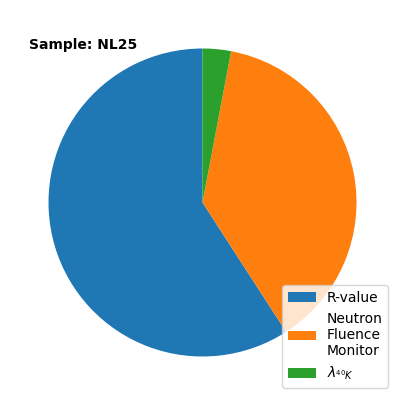

In [11]:
sj_test.Age_Uncertainty_Pie()

# Min/Kuiper et al. 

In [12]:
min_test.Age_Uncertainties_All()


Where:
  - The first uncertainty (X) is computed using only the uncertainty in R (just_R).
  - The second uncertainty (Y) combines the uncertainties of R and FCs (R_and_FCS).
  - The third uncertainty (Z) combines the uncertainties of R, FCs, and the decay constant (Lam40).


'Age: 2662.48 ± 10.09 (R only) (Ma), ± 10.15 (R + FCs) (Ma), ± 15.98 (R + FCs + Lam40) (Ma)'

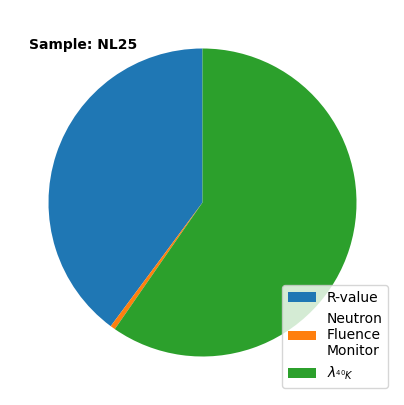

In [13]:
min_test.Age_Uncertainty_Pie()

# Renne et al. (2011)

In [14]:
renne_test.Age_Uncertainties_All()


Where:
  - The first uncertainty (X) is computed using only the uncertainty in R (just_R).
  - The second uncertainty (Y) combines the uncertainties of R and FCs (R_and_FCS).
  - The third uncertainty (Z) combines the uncertainties of R, FCs, and the decay constant (Lam40).


'Age: 2651.78 ± 10.00 (R only) (Ma), ± 10.16 (R + FCs) (Ma), ± 10.45 (R + FCs + Lam40) (Ma)'

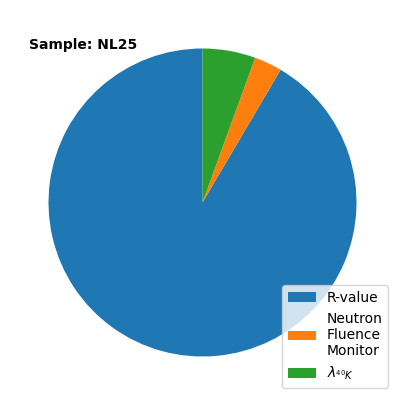

In [15]:
renne_test.Age_Uncertainty_Pie()

# Monte Carlo vs. Linear uncertainty approximation

In [29]:
MC_samples_all = []
Age_all = []
Age_err_all = []

for i in range(len(R_values)):
    inst = ArAr_Age_Calc.ArArWorkSheet(R_values[i], R_values_err[i], 
                                   sample_name = sample_names[i], 
                                  Calibration = 'BayesCal')
    # Call the Monte_Carlo_Vs_Analytical method and get results.
    # This method should take an axis as an argument, if needed.
    MC_samples, Age, Age_all_err =inst.Monte_Carlo_Vs_Analytical()
    MC_samples_all.append(MC_samples)
    Age_all.append(Age)
    Age_err_all.append(Age_all_err)

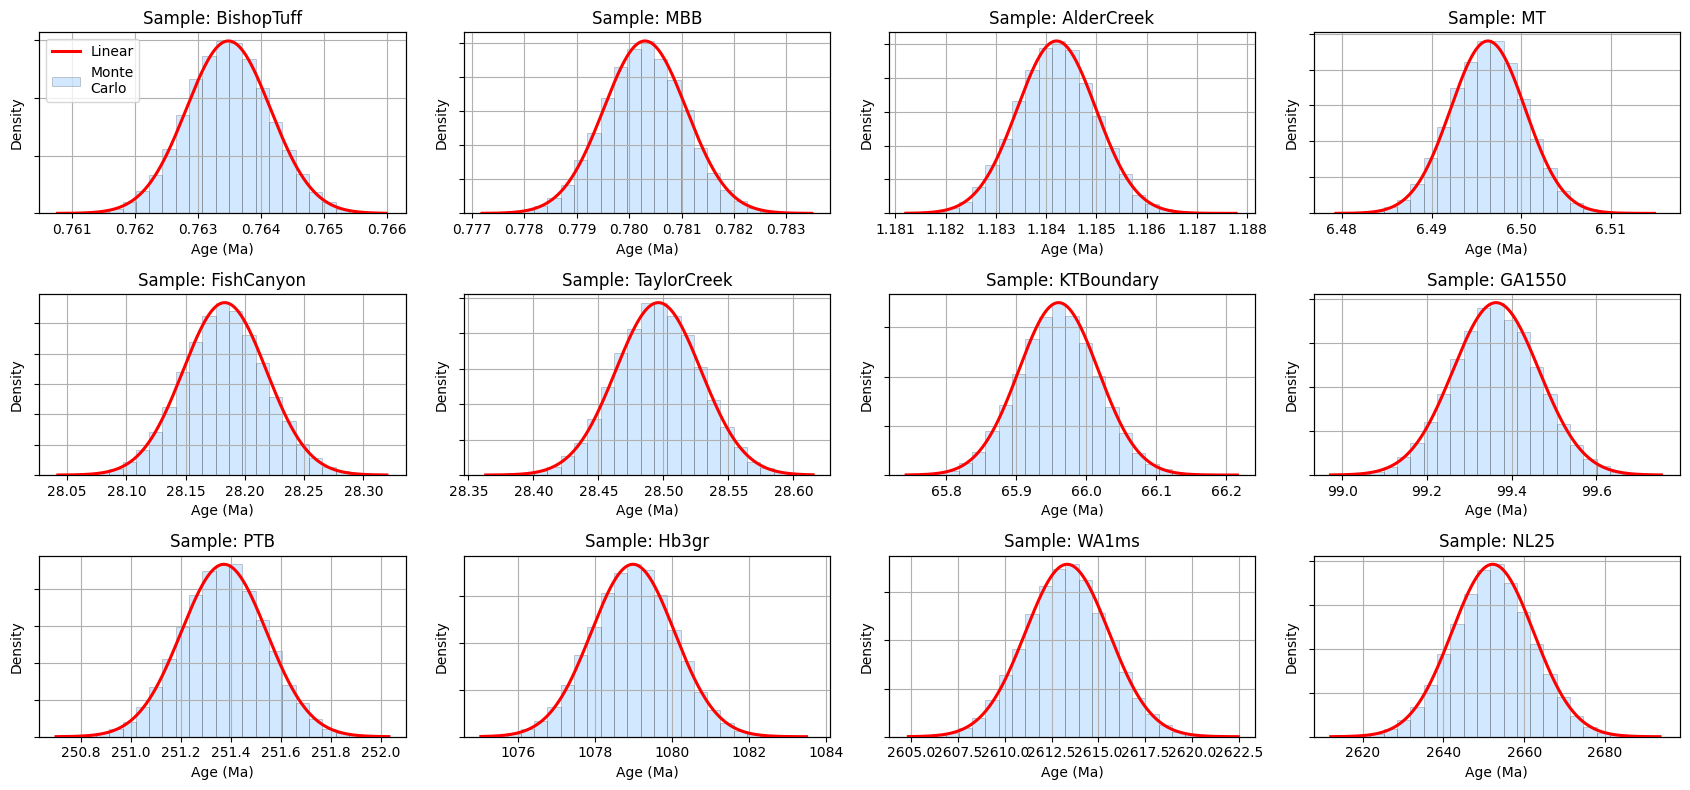

In [34]:


# Assume sample_names, R_values_std, R_values_std_err, and the following lists are defined:
# MC_samples_all, Age_all, Age_err_all
num_samples = len(sample_names)
ncols = 4
nrows =3

# Create a figure with 6 columns and 2 rows.
fig, axs = plt.subplots(nrows, ncols, figsize=(17, 8), sharex=False)
axs = axs.flatten()  # Flatten to a 1D array for easier indexing

for i in range(num_samples):
    # Determine the x-range for the current sample from its Monte Carlo samples.
    low, high = np.percentile(MC_samples_all[i]/1e6, [0.001, 99.999])
    x = np.linspace(low, high, 1000)
    
    # Create a probability density function using a normal approximation.
    pdf = norm(loc=Age_all[i], scale=Age_err_all[i]).pdf(x)
    
    # Plot the analytical age (line plot) on the main axis.
    axs[i].plot(x, pdf, label='Linear', color='r', lw=2.2, zorder=10)
    axs[i].set_ylim(bottom=0)
    axs[i].set_title(f"Sample: {sample_names[i]}")
    axs[i].set_xlabel("Age (Ma)")
    axs[i].set_ylabel("Density")
    axs[i].set_yticklabels([])
    axs[i].grid(True)
    
    # Create a twin axis for the histogram, so that both plots share the same x-axis.
    ax2 = axs[i].twinx()
    ax2.hist(MC_samples_all[i]/1e6, bins=25, alpha=0.2, color='dodgerblue', edgecolor='k', lw=0.7, zorder=1, 
            label = 'Monte\nCarlo')
    ax2.set_yticks([])
    ax2.set_ylim(bottom=0)
    
    # Bring the main axis (line plot) to the front.
    axs[i].set_zorder(10)
    axs[i].patch.set_visible(False)
    
    # Combine legends (if you want to show them for each panel)
    lines, labels = axs[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    if i == 0:
        axs[i].legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

# Remove any unused axes if the total number of samples is less than ncols*nrows.
for j in range(num_samples, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()


In [23]:
"""
Pie Chart Comparison Figure
"""
# Saving an uncertainty fraction file
# Example for Bayesian Calibration 
# Set flags in Age_Uncerainty_Pie - save = True to say an excel file with 
# the unceratinty fractions for each sample
# Then you can loop through the following cells
for i in range(len(R_values)):
    instance = ArAr_Age_Calc.ArArWorkSheet(R_values[i], R_values_err[i], 
                                   sample_name = sample_names[i], 
                                  Calibration = 'BayesCal')
    instance.Age_Uncertainty_Pie(plot = False, save = True)

/Users/jackcarter/Documents/ArAr_Uncertainty/Argon_Test/ArAr_Age_Calc.py:233: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(err_fcs_2)


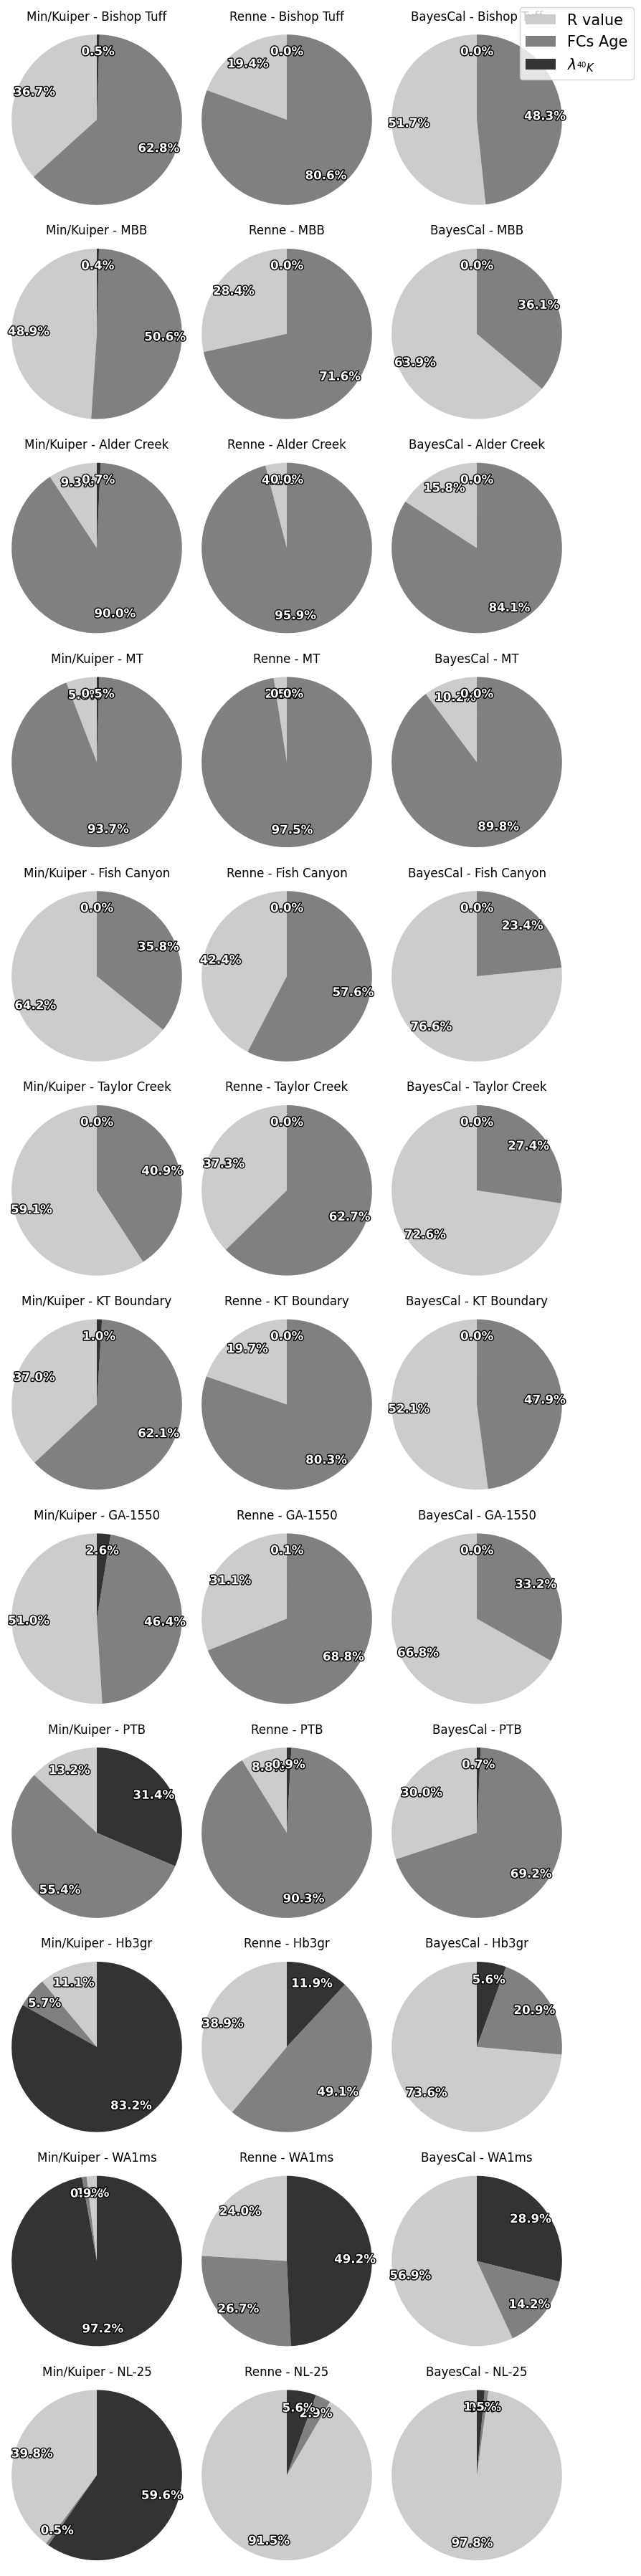

In [35]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects

# Define the directory to where you have saved the excel files
#data_path = # ....

# Define the sample order (rows) and calibrations (columns).
sample_names = ['BishopTuff', 'MBB', 'AlderCreek', 'MT', 'FishCanyon', 
                'TaylorCreek', 'KTBoundary', 'GA1550', 'PTB', 'Hb3gr','WA1ms', 'NL25']
calibrations = ["Min2000", "Renne2011", "BayesCal"]

Calnames = ['Min/Kuiper', 'Renne', 'BayesCal']
# Define sample abbreviations (adjust as needed)


sample_abbrev = {
    'BishopTuff': 'Bishop Tuff',
    'MBB': 'MBB',
    'AlderCreek': 'Alder Creek',
    'MT': 'MT',
    'FishCanyon': 'Fish Canyon',
    'TaylorCreek': 'Taylor Creek',
    'KTBoundary': 'KT Boundary',
    'GA1550': 'GA-1550',
    'PTB': 'PTB',
    'Hb3gr': 'Hb3gr',
    'WA1ms': 'WA1ms', 
    'NL25': 'NL-25'
}



nrows = len(sample_names)
ncols = len(calibrations)

# Create the subplot grid.
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 3, nrows * 3))

# Define grayscale colors for the three uncertainty components:
# lightest for R, medium for FCs Age, and darkest for λ₄₀K.
colors = ["0.8", "0.5", "0.2"]  # order: R, FCs, λ₄₀K

# Loop over each sample (row) and calibration (column).
for i, sample in enumerate(sample_names):
    for j, cal in enumerate(calibrations):
        ax = axs[i, j]
        # Construct the filename.
        filename = f"{cal}_{sample}_uncertainty_frac.xlsx"
        file_path = os.path.join(data_path, filename)
        
        if os.path.exists(file_path):
            # Read the Excel file (assuming the uncertainty fractions are in the first row).
            df = pd.read_excel(file_path, index_col=0)
            uncertainties = df.iloc[0]
            frac_R = uncertainties['R']
            frac_FCs = uncertainties['FCs']
            frac_Lam40 = uncertainties['Lambda_40']
            values = np.array([frac_R, frac_FCs, frac_Lam40])
            
            # Plot the pie chart with percentages.
            # Adjust pctdistance to push the percentages outward, reducing overlap.
            patches, texts, autotexts = ax.pie(
                values,
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                pctdistance=0.8  # Increase to space out the percentages
            )
            
            # Loop through the autopct texts and customize their appearance.
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(12)
                # Add a black outline to the text.
                autotext.set_path_effects([
                    path_effects.Stroke(linewidth=2, foreground='black'),
                    path_effects.Normal()
                ])
        else:
            # If the file isn't found, display a message.
            ax.text(0.5, 0.5, 'File Not Found',
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, color='red')
            ax.set_facecolor('lightgray')
        
        # Ensure the pie is drawn as a circle and remove axis ticks.
        ax.axis('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add a title inside each subplot: e.g. "Min2000 – BT"
        abbrev = sample_abbrev.get(sample, sample)
        ax.set_title(f"{Calnames[j]} - {abbrev}", fontsize=12)

# Add a global legend for the pie slices.
legend_elements = [
    Patch(facecolor=colors[0], label='R value'),
    Patch(facecolor=colors[1], label='FCs Age'),
    Patch(facecolor=colors[2], label='$\\lambda_{^{40}K}$')
]
fig.legend(handles=legend_elements, loc='upper right',
          fontsize= 15)

plt.tight_layout(rect=[0, 0, 0.9, 1])